## Visualization of Data

In [39]:
#importing all the required modules for Visualizations
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import warnings 
warnings.filterwarnings('ignore')

In [40]:
# Fetch and store data into Pandas DataFrame empData
empData = pd.read_csv("C:\\Users\\kiran\\Documents\\Project\\Data\\INX Clean Data.csv")
empData = empData.iloc[:,1:]
empData.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3


In [41]:
#import joblib from sklearn.externals module
from sklearn.externals import joblib

In [42]:
model = joblib.load("C:\\Users\\kiran\\Documents\\Project\\Source Code\\Model\\Employee Rating.ml")

col   = joblib.load("C:\\Users\\kiran\\Documents\\Project\\Source Code\\Model\\Features.pkg")

In [43]:
importance=model.feature_importances_

In [44]:
# sort data with label
s={}
for i in range(len(col)):
    s[col[i]]=[importance[i]]
s=pd.DataFrame(s)
s

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0.040446,0.005179,0.012695,0.010222,0.034762,0.040921,0.007879,0.031654,0.023811,0.189524,...,0.18723,0.02355,0.025268,0.017449,0.03847,0.028745,0.038106,0.08877,0.022036,0.006181


### Feature Importance

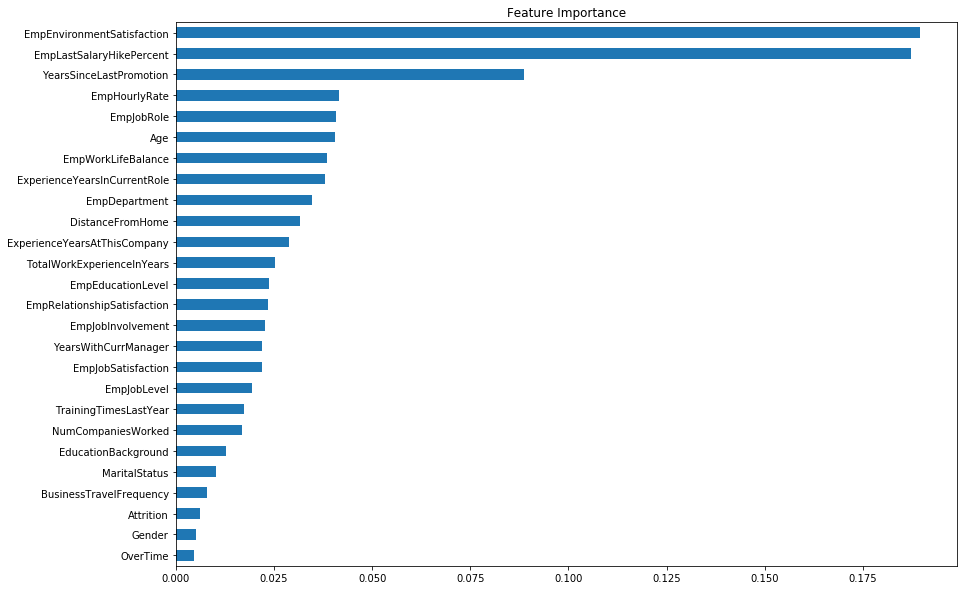

In [45]:
featureImportances = pd.Series(model.feature_importances_, index=col)
plt.figure(figsize=(14,10))
featureImportances.nsmallest(30).plot(kind='barh')
plt.title("Feature Importance")
#featureImportances.values
plt.show()

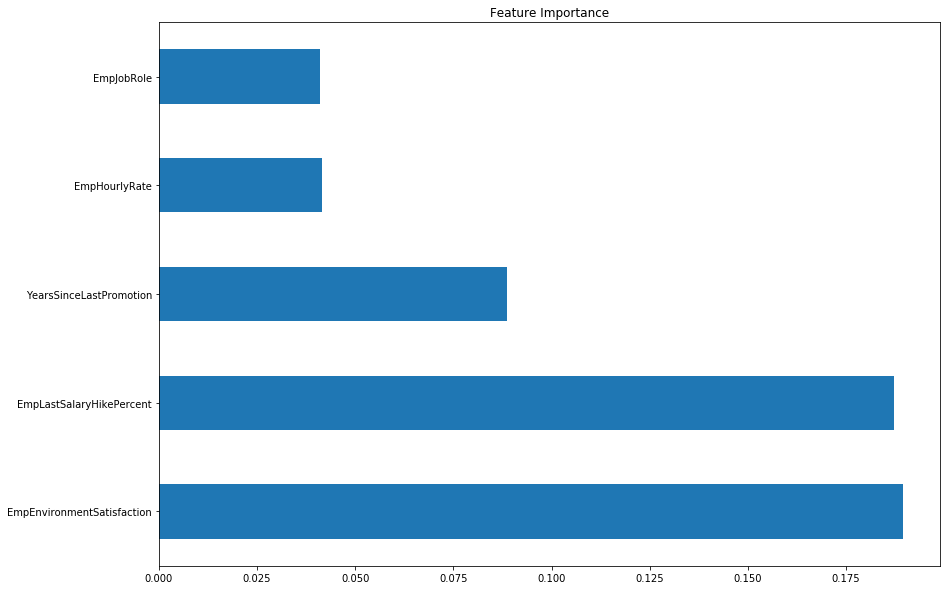

In [46]:
featureImportances = pd.Series(model.feature_importances_, index=col)
plt.figure(figsize=(14,10))
featureImportances.nlargest(5).plot(kind='barh')
plt.title("Feature Importance")
#featureImportances.values
plt.show()

In [47]:
import scipy
from scipy.stats import skew,kurtosis

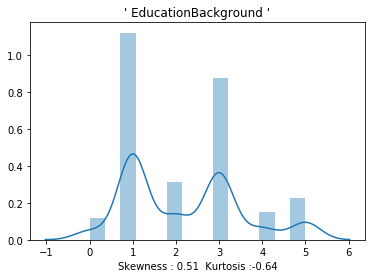

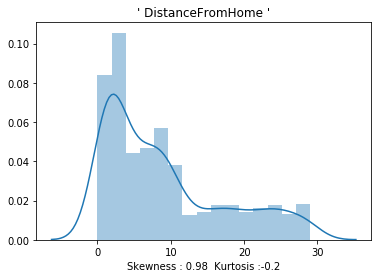

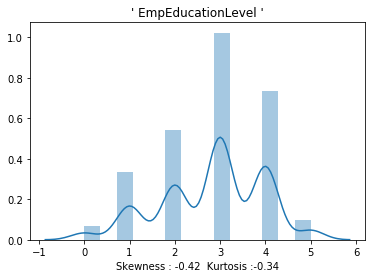

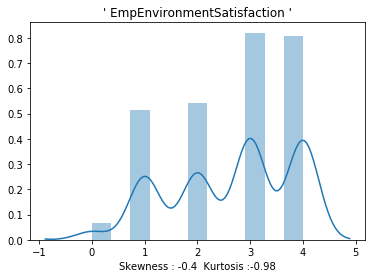

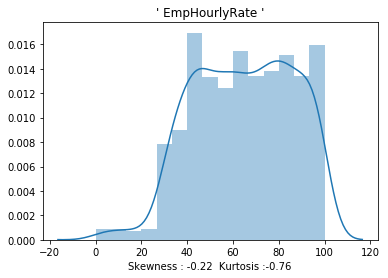

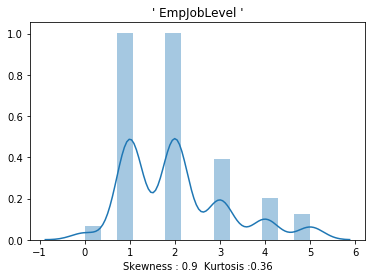

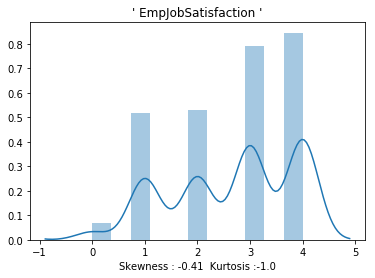

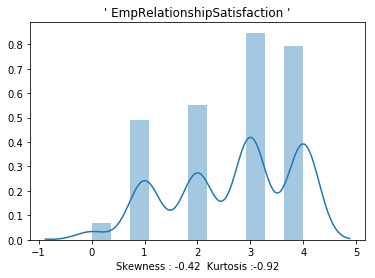

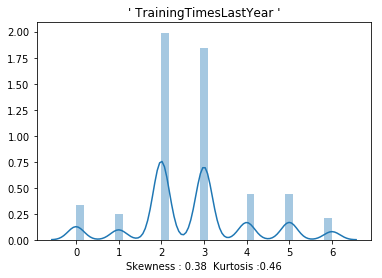

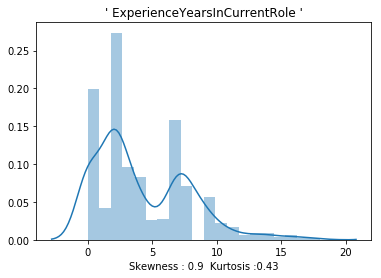

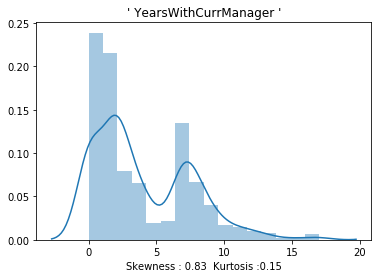

In [48]:
for i in empData:
    s=round(skew(empData[i]),2)
    k=round(kurtosis(empData[i]),2)
    if (-1<s<1)and(-1<=k<=1):
        sns.distplot(empData[i])
        plt.title("\' " + i + " \'")
        plt.xlabel("Skewness : "+str(round(skew(empData[i]),2))+"  Kurtosis :"+str(round(kurtosis(empData[i]),2)))
        plt.show()

## Performance By Department

In [49]:
rawData = pd.read_csv("C:\\Users\\kiran\\Documents\\Project\\Data\\INX Raw Data.csv")
rawData.head()
rawData1=rawData.copy()

In [50]:
from sklearn.preprocessing import LabelEncoder
encode =LabelEncoder()

In [51]:
label1=rawData1.EmpDepartment

In [52]:

rawData.EmpDepartment = encode.fit_transform(rawData.EmpDepartment)
label2=rawData.EmpDepartment
rawData.head()
d=pd.DataFrame(label1,index=range(len(label1)))
d['encode']=label2
d = d.groupby('EmpDepartment')
d.first()

,encode
EmpDepartment,
Data Science,0
Development,1
Finance,2
Human Resources,3
Research & Development,4
Sales,5


In [53]:
empData1 = rawData.loc[:,['EmpDepartment','PerformanceRating']]

In [54]:
performace={}
a=empData1[empData1.EmpDepartment == 0].values
b=[]
for i in range(len(a)):
    b.append(a[i][1])
c=np.average(b)
print("Data Science","Average           :",round(c))
performace['Data_Science']=round(c)
#print("round :",round(c))

a=empData1[empData1.EmpDepartment == 1].values
b=[]
for i in range(len(a)):
    b.append(a[i][1])
c=np.average(b)
print("Development","Average            :",round(c))
performace['Development']=round(c)
#print("round :",round(c))

a=empData1[empData1.EmpDepartment == 2].values
b=[]
for i in range(len(a)):
    b.append(a[i][1])
c=np.average(b)
print("Finance","Average                :",round(c))
performace['Finance']=round(c)
#print("round :",round(c))

a=empData1[empData1.EmpDepartment == 3].values
b=[]
for i in range(len(a)):
    b.append(a[i][1])
c=np.average(b)
print("Human Resources","Average        :",round(c))
performace['Human_Resources']=round(c)
#print("round :",round(c))

a=empData1[empData1.EmpDepartment == 4].values
b=[]
for i in range(len(a)):
    b.append(a[i][1])
c=np.average(b)
print("Research & Develepment","Average :",round(c))
performace['Research_Develepment']=round(c)
#print("round :",round(c))

a=empData1[empData1.EmpDepartment == 5].values
b=[]
for i in range(len(a)):
    b.append(a[i][1])
c=np.average(b)
print("Sales","Average                  :",round(c))
performace['Sales']=round(c)
#print("round :",round(c))
performace

Data Science Average           : 3.0
Development Average            : 3.0
Finance Average                : 3.0
Human Resources Average        : 3.0
Research & Develepment Average : 3.0
Sales Average                  : 3.0


{'Data_Science': 3.0,
 'Development': 3.0,
 'Finance': 3.0,
 'Human_Resources': 3.0,
 'Research_Develepment': 3.0,
 'Sales': 3.0}

Text(1, 0, 'Excellent')

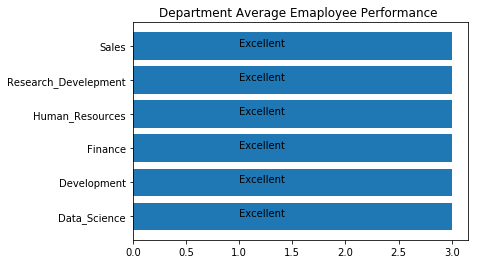

In [55]:
x=list(performace.values())
y=list(performace.keys())
plt.title("Department Average Emaployee Performance ")
plt.barh(y,x)

plt.annotate("Excellent",[1,5])
plt.annotate("Excellent",[1,4])
plt.annotate("Excellent",[1,3])
plt.annotate("Excellent",[1,2])
plt.annotate("Excellent",[1,1])
plt.annotate("Excellent",[1,0])

In [56]:
empData2 = rawData1.loc[:,['EmpDepartment','PerformanceRating']]
empData1.head()

,EmpDepartment,PerformanceRating
0,5,3
1,5,3
2,5,4
3,3,3
4,5,3


<Figure size 720x720 with 0 Axes>

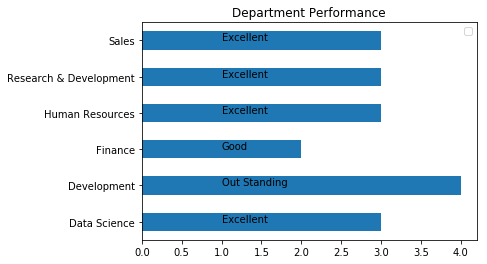

In [57]:
data_grp=empData2.groupby('EmpDepartment')
a=pd.DataFrame(data_grp.first())
plt.figure(figsize=[10,10])
a.plot(kind='barh')
plt.ylabel("")
plt.legend("")
plt.title("Department Performance")
plt.annotate("Excellent",[1,5])
plt.annotate("Excellent",[1,4])
plt.annotate("Excellent",[1,3])
plt.annotate("Good",[1,2])
plt.annotate("Out Standing",[1,1])
plt.annotate("Excellent",[1,0])
plt.show()

# END OF PROJECT